In [434]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from unidecode import unidecode
pd.set_option('display.max_columns',30)

In [435]:
giay_nam = pd.read_csv('D:\TIKI\giay-nam.csv')
giay_nu = pd.read_csv('D:\TIKI\giay-nu.csv')
giay_nam = giay_nam.drop(columns=['Unnamed: 0'])
giay_nu = giay_nu.drop(columns=['Unnamed: 0'])

In [436]:
giay_nam_id = pd.read_csv('giay-nam-id.csv',usecols=['product_id','category_name'])
giay_nu_id = pd.read_csv('giay-nu-id.csv',usecols=['product_id','category_name'])
giay_nam_id = giay_nam_id.drop_duplicates()
giay_nu_id = giay_nu_id.drop_duplicates()

In [437]:
giay_nam = giay_nam.merge(giay_nam_id,left_on='id',right_on='product_id',how='left')
giay_nu = giay_nu.merge(giay_nu_id,left_on='id',right_on='product_id',how='left')
giay_nam = giay_nam.drop(columns=['product_id'])
giay_nu = giay_nu.drop(columns=['product_id'])

In [438]:
#I add tag 'man' / 'woman' into category_name to ensure that there are no identical category name in both table when concatenated later
giay_nam['category_name'] = 'MAN-'+giay_nam['category_name']
giay_nam['root_category'] = 'giay-nam'

giay_nu['category_name'] = 'WOMAN-'+giay_nu['category_name']
giay_nu['root_category'] = 'giay-nu'

In [439]:
last_update = '2023-06-18 18:00:00'
concat_df = pd.concat([giay_nam,giay_nu])
concat_df['last_update'] = pd.to_datetime(last_update)
concat_df = concat_df.reset_index()
concat_df = concat_df.drop(columns='index')
concat_df = concat_df.drop_duplicates(subset=['id'])

In [440]:
concat_df.sample(3)

,id,sku,name,discription,original_price,list_price,price,alltime_quantity_sold,quantity_sold,inventory_status,fulfillment_type,brand,category_id,category,review_count,rating_average,favourite_count,ASA_cashback,pay_later,current_seller,date_created,video_url,category_name,root_category,last_update
34800,155110908,2889838869667,Sandal unisex nam nữ quai ngang cao cấp hiệu M...,THÔNG TIN SẢN PHẨM- Thương hiệu: MOL- Mã sản p...,310000,310000,310000,6,6.0,available,dropship,MOL,49556,Giày sandals đế bằng,2,4.5,0,"Thưởng 70,25 ASA (≈ 15.033đ)","{'title': 'Trả góp 0%', 'summary': 'Mua trước ...",MOL VN,530,NaN,WOMAN-giay-sandals-de-bang,giay-nu,2023-06-18 18:00:00
28548,207726090,2886070519607,Giày Cao Gót Nữ BIGGBEN Da Bò Thật Gót 6 Phân ...,Sandal Nữ sản phẩm được thiết kế bền đẹp kết h...,420000,420000,259000,2,2.0,available,dropship,BIGGBEN,49548,Giày cao gót hở mũi,2,5.0,0,"Thưởng 1,29 ASA (≈ 278đ)","{'title': 'Trả góp 0%', 'summary': 'Mua trước ...",Shoes BIGBEN,200,NaN,WOMAN-giay-cao-got-ho-mui,giay-nu,2023-06-18 18:00:00
9061,101657409,8675116360413,Giày Tăng Chiều Cao 6cm Giầy Tăng Chiều Cao Na...,Giày Tăng Chiều Cao 6cm với chất liệu ...,605000,605000,605000,1,1.0,available,dropship,OEM,49630,Giày tây nam có dây,0,0.0,0,"Thưởng 3,02 ASA (≈ 653đ)","{'title': 'Trả góp 0%', 'summary': 'Mua trước ...",Sans Shop Fashion,752,https://sand.tikicdn.com/ts/video/ae/38/5f/e3b...,MAN-giay-tay-nam-co-day,giay-nam,2023-06-18 18:00:00


## PREPROCESSING DATA

In [441]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42648 entries, 0 to 42980
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     42648 non-null  int64         
 1   sku                    42648 non-null  int64         
 2   name                   42648 non-null  object        
 3   discription            42648 non-null  object        
 4   original_price         42648 non-null  int64         
 5   list_price             42648 non-null  int64         
 6   price                  42648 non-null  int64         
 7   alltime_quantity_sold  42648 non-null  object        
 8   quantity_sold          13295 non-null  float64       
 9   inventory_status       42648 non-null  object        
 10  fulfillment_type       42647 non-null  object        
 11  brand                  42648 non-null  object        
 12  category_id            42648 non-null  int64         
 13  c

In [442]:
concat_df['has_video'] = concat_df['video_url'].notna()
concat_df['alltime_quantity_sold'] = concat_df['alltime_quantity_sold'].replace('{}',0).astype(int)
concat_df['quantity_sold'] = concat_df['quantity_sold'].fillna(0)
concat_df['rating_average'] = concat_df['rating_average']
concat_df['ASA_cashback_transformed'] = concat_df['ASA_cashback'].apply(lambda x: float(x.split()[1].replace(',','.')))
concat_df['pay_later'] = concat_df['pay_later'].notna()
concat_df['brand'] = concat_df['brand'].replace('\tOEM','OEM')
concat_df['discount_rate'] = (concat_df['list_price'] - concat_df['price']) / concat_df['list_price']

In [443]:
#In my random investigation of item name, i found out that there are a number of products which are actually not shoes but classified
# in shoes category(both men's and women's)
keyword = ['giay', 'dep', 'boot', 'boots', 'guoc','xuc', 'suc', 'sandal','sandals', 'got', 'xang dan',
           'sandan', 'chai', 've sinh', 'dung', 'bot', 'sneaker', 'sneakers', 'ung','tong','crocs',
           'marten']
ascii_keywords = [unidecode(word) for word in keyword]

concat_df['name_normal'] = concat_df['name'].str.lower().apply(unidecode)
concat_df['discription_normal'] = concat_df['discription'].str.lower().apply(unidecode)

concat_df = concat_df.loc[((concat_df['name_normal'].str.contains('|'.join(ascii_keywords))) | (concat_df['discription_normal'].str.contains('|'.join(ascii_keywords))))]

the results has filtered out >200 id not relevant. Mostly socks, shirts, etc.

# check duplicate columns

In [444]:
#check 'alltime_quantity_sold' vs 'quantity_sold'
print(concat_df.loc[concat_df['alltime_quantity_sold'].astype(float) != concat_df['quantity_sold']])

#check 'original_price' vs 'list_price'
print(concat_df.loc[concat_df['list_price'] != concat_df['original_price']])

Empty DataFrame
Columns: [id, sku, name, discription, original_price, list_price, price, alltime_quantity_sold, quantity_sold, inventory_status, fulfillment_type, brand, category_id, category, review_count, rating_average, favourite_count, ASA_cashback, pay_later, current_seller, date_created, video_url, category_name, root_category, last_update, has_video, ASA_cashback_transformed, discount_rate, name_normal, discription_normal]
Index: []
Empty DataFrame
Columns: [id, sku, name, discription, original_price, list_price, price, alltime_quantity_sold, quantity_sold, inventory_status, fulfillment_type, brand, category_id, category, review_count, rating_average, favourite_count, ASA_cashback, pay_later, current_seller, date_created, video_url, category_name, root_category, last_update, has_video, ASA_cashback_transformed, discount_rate, name_normal, discription_normal]
Index: []


In [445]:
concat_df = concat_df.drop(columns=['quantity_sold','original_price'])

## DATA SUMMARY 

In [446]:
concat_df.sample(3)

,id,sku,name,discription,list_price,price,alltime_quantity_sold,inventory_status,fulfillment_type,brand,category_id,category,review_count,rating_average,favourite_count,ASA_cashback,pay_later,current_seller,date_created,video_url,category_name,root_category,last_update,has_video,ASA_cashback_transformed,discount_rate,name_normal,discription_normal
15927,205526961,2609378031271,Giày Tây Nam Da Bóng Khóa Kim Loại Lịch Lãm ( ...,"Giày được thiết kế tinh tế , sang trọng với ...",195000,149000,0,available,dropship,OEM,49626,Giày lười da nam,0,0.0,0,"Thưởng 0,74 ASA (≈ 160đ)",True,Giày da thật 24H,216,NaN,MAN-giay-luoi-da-nam,giay-nam,2023-06-18 18:00:00,False,0.74,0.235897,giay tay nam da bong khoa kim loai lich lam ( ...,"giay duoc thiet ke tinh te , sang trong voi ..."
17889,103938871,3320466418543,Dép xỏ ngón Unisex Crocs Crocband Printed 205943,Kiểu dáng Thể thao và Siêu nhẹ. Sở hữu thiết k...,895000,448000,38,available,dropship,Crocs,10383,Dép nam xỏ ngón,4,5.0,0,"Thưởng 2,24 ASA (≈ 481đ)",True,Supersports Vietnam,741,NaN,MAN-dep-nam-xo-ngon,giay-nam,2023-06-18 18:00:00,False,2.24,0.499441,dep xo ngon unisex crocs crocband printed 205943,kieu dang the thao va sieu nhe. so huu thiet k...
23501,204429922,8882920273802,Sandals Cao Gót Quai Trong Đính Đá Exull Mode ...,- Màu Sắc: Màu Bạc hoặc Hồng quai trong đính đ...,1799000,1799000,0,available,dropship,Exull,49544,Giày cao gót quai sau,0,0.0,0,"Thưởng 8,99 ASA (≈ 1.924đ)",True,EXULL OFFICIAL,225,NaN,WOMAN-giay-cao-got-quai-sau,giay-nu,2023-06-18 18:00:00,False,8.99,0.000000,sandals cao got quai trong dinh da exull mode ...,- mau sac: mau bac hoac hong quai trong dinh d...


In [447]:
concat_df['fulfillment_type'].value_counts()

dropship           42060
seller_delivery      216
tiki_delivery        166
cross_border           1
Name: fulfillment_type, dtype: int64

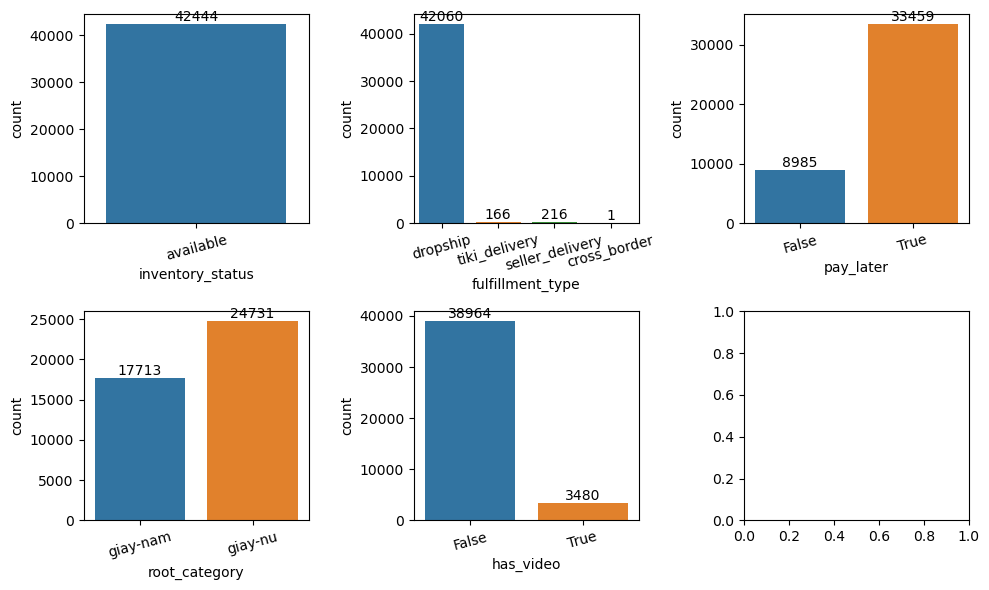

In [448]:
cat_cols = ['inventory_status', 'fulfillment_type', 'pay_later', 'root_category', 'has_video']
fig, axes = plt.subplots(figsize=(10, 6), nrows=2, ncols=3)

for col, ax in zip(cat_cols, axes.ravel()):
    sns.countplot(data=concat_df, x=col, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.tight_layout()

- 'inventory_status': there is only 1 value 'available' -> we can drop this column
- 'fulfillment_type': dropship is the dominant fulfillment type in these category. Dropship means the sellers send products to TIKI then TIKI takes care of delivery. TIKI_delivery means the sellers give products priorly to TIKI warehouse (consignment selling) then TIKI takes care of all afterward delivery. seller_delivery means the sellers send goods directly to customers themselves. Cross_border means selling overseas
- 'Pay_later': It is surpring that low-price, common products like shoes having pay_later policy available. I think that this is an 'add-on service' only and it does not have any usability here as a role of customers.
- 'Root-category': Women's shoes have more products listed on TIKI in comparison with men's. ALso, sub-categories inside womens'shoes are also more than men's footwears.
- 'has_video': This feature indicates whether or not the sellers have short_clips on product's postings

# COMPARISON BETWEEN TWO ROOT CATEGORY

In [449]:
# distribution cua price vs list price
# concat_df['discount_rate'] = concat

In [450]:
concat_df.sample()

,id,sku,name,discription,list_price,price,alltime_quantity_sold,inventory_status,fulfillment_type,brand,category_id,category,review_count,rating_average,favourite_count,ASA_cashback,pay_later,current_seller,date_created,video_url,category_name,root_category,last_update,has_video,ASA_cashback_transformed,discount_rate,name_normal,discription_normal
33159,217506126,4719484526604,Giày nữ búp bê TiTi ĐÔ da bò thật cao cấp GBBN...,Giày nữ búp bê TiTi ĐÔ da bò thật cao cấp GBBN...,393000,268000,0,available,dropship,OEM,49566,Giày búp bê mũi tròn,0,0.0,0,"Thưởng 1,34 ASA (≈ 288đ)",True,Shoes TiTi Đô,106,NaN,WOMAN-giay-bup-be-mui-tron,giay-nu,2023-06-18 18:00:00,False,1.34,0.318066,giay nu bup be titi do da bo that cao cap gbbn...,giay nu bup be titi do da bo that cao cap gbbn...


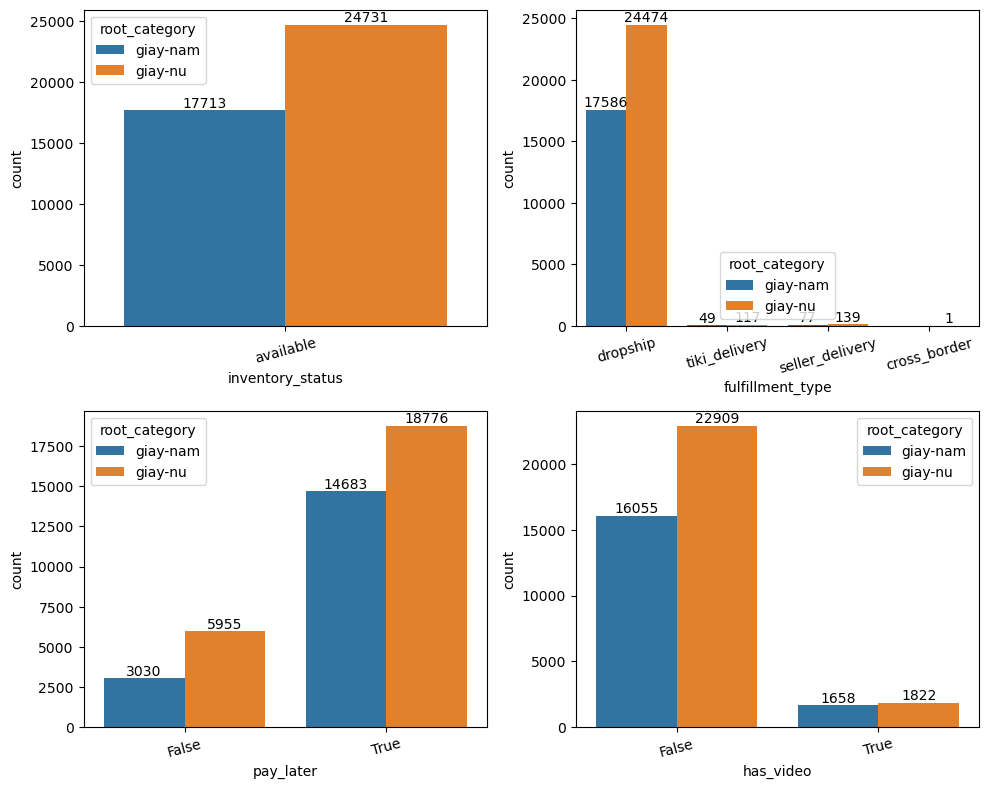

In [451]:
cat_cols = ['inventory_status', 'fulfillment_type', 'pay_later', 'has_video']
fig, axes = plt.subplots(figsize=(10, 8), nrows=2, ncols=2)

for col, ax in zip(cat_cols, axes.ravel()):
    sns.countplot(data=concat_df, x=col, ax=ax, hue='root_category')
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=15)

plt.tight_layout()

We can see in the overview chart comparing men's and women' shoes that women's shoes dominates in most counting because the women's product id is much higher than men's id

In [452]:
avg_price_df = concat_df.groupby(['category_name', 'root_category'])['list_price'].mean().reset_index()
avg_price_df = avg_price_df.sort_values(by='list_price',ascending=False)

fig = px.bar(avg_price_df, x='category_name', y='list_price', color='root_category')
fig.update_layout(title='Average Price of Each Category')
fig.show()

By comparing 2 category on PRICE, we can see:
- product of price > 1 are sandals, sport sneakers, men's western shoes (giay tay), men's plastic boots (CROCS shoes)
- MID PRICE RANGE 200k - 500k: other shoes
- PRICE <200k: shoes'accesories, men's slippers

In [453]:
avg_price_df = concat_df.groupby(['category_name', 'root_category'])['alltime_quantity_sold'].sum().reset_index()
avg_price_df = avg_price_df.sort_values(by='alltime_quantity_sold',ascending=False)

fig = px.bar(avg_price_df, x='category_name', y='alltime_quantity_sold', color='root_category')
fig.update_layout(title='Products Sold of Each Category')
fig.show()

IN WOMEN's products:
- most bought items are: Miếng lót giày, slippers, dép quai ngang, sneakers, giày búp bê
IN MEN's products:
- most bought items are: sneakers, dép quai ngang, accesories, miếng lót giày, shoes'cleanings

We can see that: miếng lót giày are heavily bought in both men's & women's categories and this item can be treated as unisex product.
Moreover, 'dép quai ngang' are hot sales in both

In [454]:
concat_df['estimated_revenue'] = concat_df['price']*concat_df['alltime_quantity_sold']
grouped_revenue_df = concat_df.groupby(['category_name', 'root_category'])['estimated_revenue'].sum().reset_index()
grouped_revenue_df = grouped_revenue_df.sort_values(by='estimated_revenue',ascending=False)

fig = px.bar(grouped_revenue_df, x='category_name', y='estimated_revenue', color='root_category')
fig.update_layout(title='Estimated Revenue of Each Category')
fig.show()

In this chart, I tried multiplying the 'list_price' & 'quantity sold' (just an estimated revenue because price has the trend to go down overtime, so this revenue is just an under-estimation for all categories)
WE see that:
- Men's SNEAKERS(both high-top and low-top models) sold the most revenue
- 'Dép quai ngang' gets high revenue on both categories

In [455]:
grouped_revenue_df = concat_df.groupby('root_category')['estimated_revenue'].sum().reset_index()
grouped_revenue_df = grouped_revenue_df.sort_values(by='estimated_revenue', ascending=False)

fig = px.bar(grouped_revenue_df, x='root_category', y='estimated_revenue', color='root_category')
fig.update_layout(title='Estimated Revenue of Each Category')
fig.show()

We can see a fun fact here:
Even though the WOMEN's shoes categories have more products posted than MEN's (24,731 women' items > 17713 men's items) nearly 1.4x products id of men's id, the estimated revenue for men's shoes is higher (25.79B men's revenue > 20.14B women's revenue) nearly 1.28x

In [459]:
top_brands = concat_df.groupby('brand')['estimated_revenue'].sum().nlargest(20).reset_index()['brand'].to_list()
concat_df_top_brands = concat_df.loc[concat_df['brand'].isin(top_brands)].groupby(['brand', 'root_category'])['estimated_revenue'].sum().reset_index()

fig = px.bar(concat_df_top_brands, x='brand', y='estimated_revenue', color='root_category', barmode='group')
fig.update_layout(title='Revenue by Brand')
fig.update_layout(xaxis={'categoryorder': 'total descending'})

This chart makes me think of some odd because some top brands such as CONVERSE, BITIS only show mens'collections.
After investigating on TIKI, I found out:
- Converse brand is unisex and they post under MENS' Shoes rather women's shoes.
- Bitis are famous brand but revenue is too low because they are listed under another root category which is 'Thể thao - Dã Ngoại'

The most revenue is from OEM footwears, which is 'no brand'

## MODELS TO PREDICT QUANTITY SOLD